In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mannwhitneyu as mwu
import seaborn as sns


In [3]:
data = pd.read_csv("anon-data/participants.csv")
control = pd.read_csv("anon-data/control.txt", names=["id"])
experimental = pd.read_csv("anon-data/experimental.txt", names=["id"])

In [4]:
control_list = [x[0] for x in control.values.tolist()]
experimental_list = [x[0] for x in experimental.values.tolist()]

In [5]:
data_control = data[data["id"].isin(control_list)].drop('id', axis=1)
data_experimental = data[data["id"].isin(experimental_list)].drop('id', axis=1)

In [6]:
def get_mean_std_mwu(ctrl, exp, colname):
    ctrl_vals = ctrl[colname]
    exp_vals = exp[colname]

    avg_ctrl = ctrl_vals.mean()
    avg_exp = exp_vals.mean()

    std_ctrl = ctrl_vals.std()
    std_exp = exp_vals.std()

    mwu_result = mwu(ctrl_vals, exp_vals)

    return (avg_ctrl, std_ctrl, avg_exp, std_exp, mwu_result[0], mwu_result[1])


In [7]:
colnames = ["Total Duration (Task 1)", 
            "Total Duration (Task 2)", 
            "Total Duration (Task 3)", 
            "Context Switches (Task 1)", 
            "Context Switches (Task 2)", 
            "Context Switches (Task 3)"]

for i in colnames:
    print(get_mean_std_mwu(data_control, data_experimental, i))

(863.3333333333334, 518.226141113446, 718.5, 286.37824638055173, 4.0, 0.8)
(703.3333333333334, 432.9079963841432, 378.5, 156.27059864222701, 5.0, 0.4)
(328.3333333333333, 223.05231075542198, 366.5, 231.22391744800103, 3.0, 1.0)
(36.333333333333336, 24.337899115029078, 9.0, 8.48528137423857, 5.0, 0.4)
(25.666666666666668, 13.428824718989125, 5.5, 0.7071067811865476, 6.0, 0.2)
(17.0, 12.0, 3.0, 1.4142135623730951, 6.0, 0.2)


In [8]:
def plot_context(ctrl, exp, context):
    ctrl_with_group = ctrl.assign(group = ["control"] * len(ctrl))
    exp_with_group = exp.assign(group = ["experimental"] * len(exp))

    merged_data = pd.concat([ctrl_with_group, exp_with_group])

    cols = [f"{context} (Task 1)",
            f"{context} (Task 2)",
            f"{context} (Task 3)",
            "group"]

    subset = merged_data[cols]

    new_df_elems = []

    for _, row in subset.iterrows():
        time_task_1 = row[f"{context} (Task 1)"]
        time_task_2 = row[f"{context} (Task 2)"]
        time_task_3 = row[f"{context} (Task 3)"]

        new_df_elems.append([time_task_1, 1, row["group"]])
        new_df_elems.append([time_task_2, 2, row["group"]])
        new_df_elems.append([time_task_3, 3, row["group"]])

    new_df = pd.DataFrame(new_df_elems, columns=["Time (seconds)", "Task", "Group"])

    sns.boxplot(y='Time (seconds)', x='Task', data=new_df, hue='Group')
    plt.title(f"In {context}")
    plt.show()  

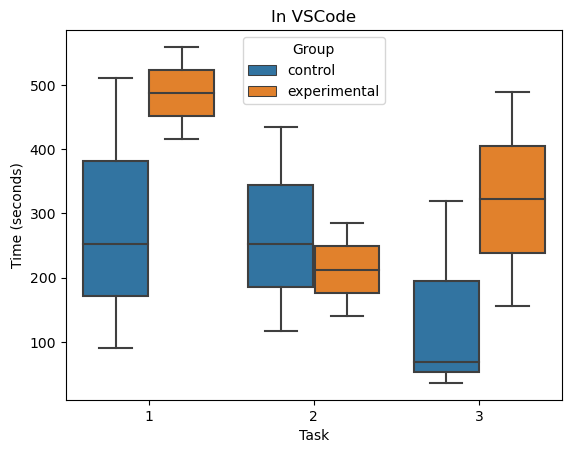

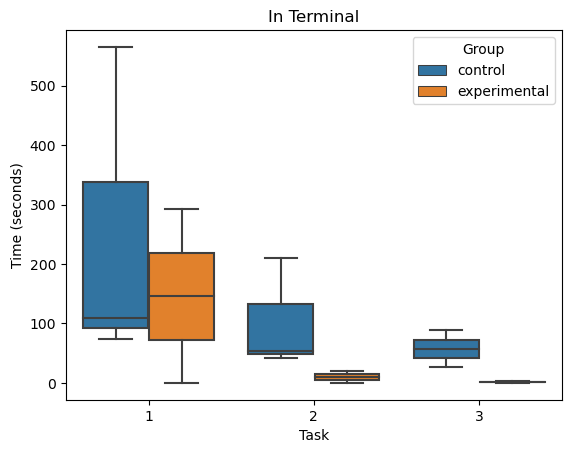

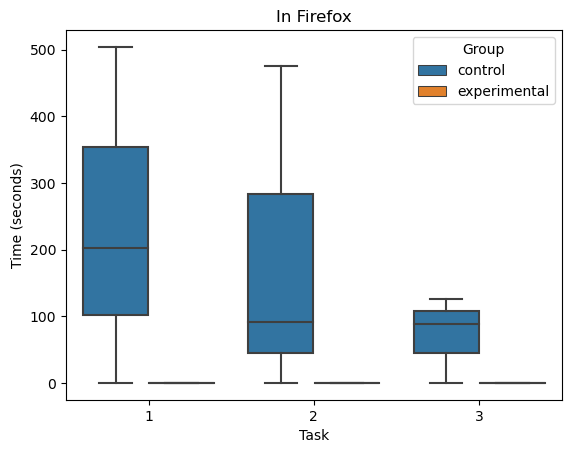

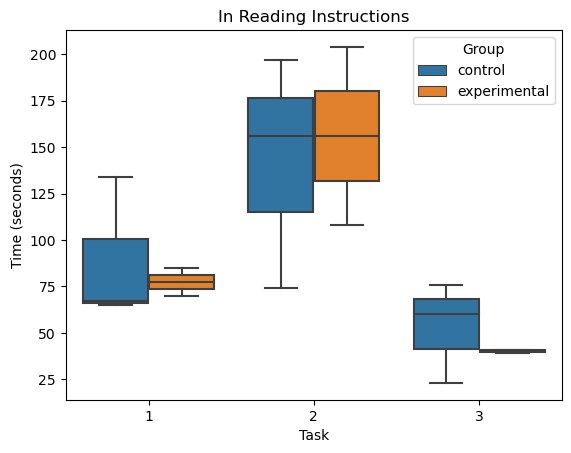

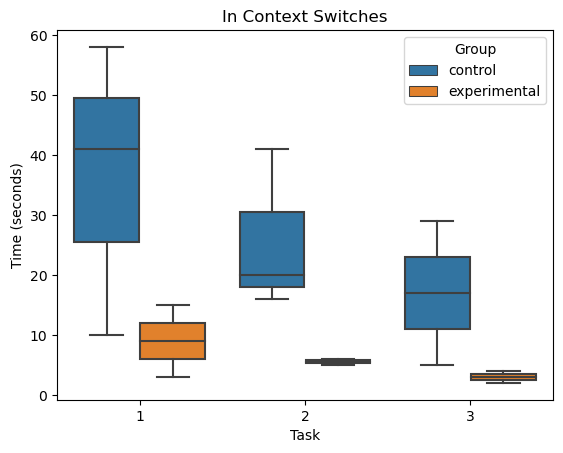

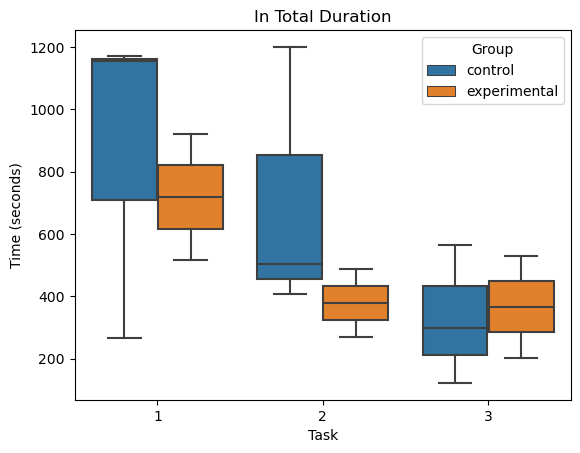

In [10]:
contexts = ["VSCode", "Terminal", "Firefox", "Reading Instructions", "Context Switches", "Total Duration"]

for i in contexts:
    plot_context(data_control, data_experimental, i)